# 1) Plots environmental vs system parameters

Import data

In [54]:
import pandas as pd

file = "LookUpTables/light.xlsx"
df_light = pd.read_excel(file)

df_light.head()

,Light value,p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry
0,0.6,0.954545,0.621005,0.136986,0.779412,154.529762,356.555556,32.708333,58.588235,86.900000,53.683824,0.6
1,0.7,0.975000,0.647208,0.109137,0.796078,129.773026,360.111111,32.659375,59.418919,55.116279,53.968627,0.6
2,0.8,0.980556,0.659033,0.101781,0.772201,133.491749,353.000000,32.481707,58.907692,70.100000,54.741313,0.6
3,0.9,0.991667,0.681467,0.081081,0.745042,126.370629,360.000000,31.844749,59.037500,65.095238,54.626062,0.6
4,1.0,0.994444,0.684615,0.082051,0.767790,128.260870,360.000000,31.843195,59.134615,57.625000,52.284644,0.6


In [55]:
file = "LookUpTables/frictionObject.xlsx"
df_friction_obj = pd.read_excel(file)

df_friction_obj.head()

,Object friction,p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry
0,0.5,0.977419,0.792049,0.073394,0.088803,128.296296,360.000,32.273050,58.400000,88.833333,52.366795,0.6
1,0.6,0.973154,0.709581,0.131737,0.940928,137.059289,350.125,32.174242,59.085714,60.159091,53.818565,0.6
2,0.7,0.982759,0.783871,0.080645,0.921811,123.496000,360.000,31.965779,59.489362,54.200000,55.765432,0.6
3,0.8,0.993103,0.710280,0.102804,0.956140,135.500000,360.000,32.214815,58.372549,65.757576,54.548246,0.6
4,0.9,0.982143,0.562712,0.067797,0.939759,129.117647,360.000,32.240964,59.934783,63.400000,54.000000,0.6


In [56]:
file = "LookUpTables/frictionFloor.xlsx"
df_friction_floor = pd.read_excel(file)

df_friction_floor.head()

,Floor friction,p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry
0,0.25,0.945161,0.648148,0.095679,0.785714,143.345865,360.058824,32.286765,58.423077,88.903226,57.195238,0.6
1,0.30,0.981081,0.664198,0.103704,0.769517,141.833846,360.000000,31.777778,58.847222,68.523810,56.304833,0.6
2,0.35,0.988235,0.655352,0.122715,0.772908,131.530822,352.250000,32.574675,59.853333,63.936170,54.509960,0.6
3,0.40,0.992248,0.745318,0.041199,0.758794,119.696035,360.000000,31.933333,59.259259,39.727273,52.864322,0.6
4,0.45,1.000000,0.652830,0.094340,0.751445,119.933649,-1.000000,32.754464,59.146341,57.800000,50.583815,0.6


## Plot each of the operational parameters.

Each operational parameters is plot against the three environmental parameters. If there is some dependency between the environmental and operational ones, the plots should show some trend.
To better compare these plots, the range of the Y axis can be selected with the variable ```plotRange```.

If empty ```plotRange=[]```, the Y axis is auto-adjunted.

To plot a system parameters set the name in ```operational_parameter``` and the Y axis range (or []):
```plot_operationalParam_vs_environmentalVariables(operational_parameter='p1',plotRange=[0.94, 1])```



Note:
- p3 - considered a function of the floor but no visible trend
- TR - check if only dependant of Floor (as it varies in a very large range in all of them ~[90,50]
- T3 - assumed fixed but it seems to vary with floor and object

The following function from Jupyter Notebook 1 (1Plots_param...) has to be redone
- p4  - change function.  Add clause if p4=f(object) > 0.6 then p1=1

The following function has to be checked:
- T1 as an average of light and floor, check if this makes sense.

In [57]:
#Functions to plot environmental parameters against an operational one
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def _plot_fitted_function(df, column1, column2, fit_function, popt, plotRange):
    x = df[column1]
    y = df[column2]
    # plot
    plt.scatter(x, y)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'{column1} vs {column2}')
    
    #get more x points to visualise the fitted function
    # Get the minimum and maximum values
    min_value = x.min()
    max_value = x.max()
    # Create a vector of 100 points between min_value and max_value
    xpoints = np.linspace(min_value, max_value, 100)

    plt.plot(xpoints, fit_function(xpoints, *popt), 'r-', label='Fit')
    # Set the y-axis range (adjust as needed)
    if plotRange!=[]:
        plt.ylim(plotRange[0], plotRange[1])
    # plot the fitted curve
    plt.show()
    return plt

#Get function from env. parameters to system parameters
def _fitCurve(df, column1, column2,  fit_function=None):
    # Fit a curve to the data
    x = df[column1]
    y = df[column2]
    if fit_function is None:
        fit_function = lambda x, a, b: a*x + b  # Default: linear fit
    popt, _ = curve_fit(fit_function, x, y)
    return popt


def plot_operationalParam_vs_environmentalVariables(operational_parameter,plotRange):
    env = ['Light value','Floor friction','Object friction']
    dfs = {env[0]:df_light , env[1]:df_friction_floor , env[2]:df_friction_obj}
    plots = []
    for e in env:
        # choose fitting model
        #fit_function = lambda x, a, b, c, d: a*x*x*x + b*x*x + c*x + d
        fit_function = lambda x, a, b: a*x + b  # Default: linear fit
        # fit curve
        popt = _fitCurve(dfs[e], e, operational_parameter,fit_function)
        # plot
        plots.append( _plot_fitted_function(dfs[e], e, operational_parameter, fit_function, popt, plotRange) )
    plt.show()

## p1

Considered function of: light


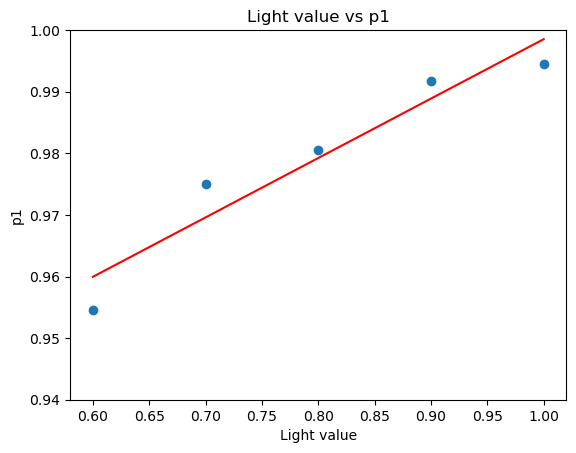

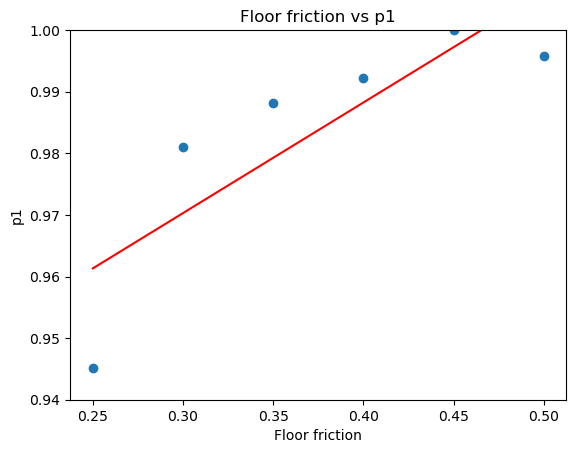

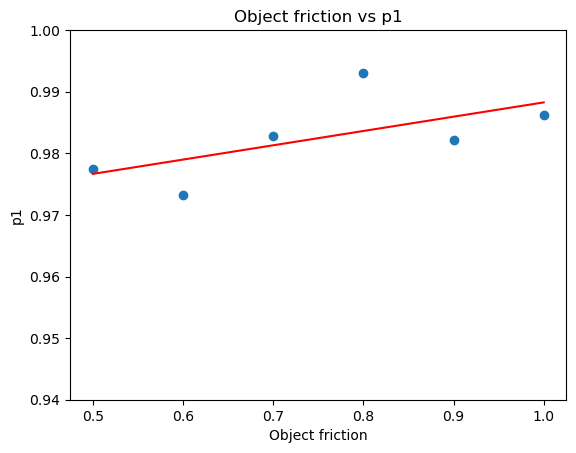

In [58]:
print("Considered function of: "+"light")
plot_operationalParam_vs_environmentalVariables(operational_parameter='p1',plotRange=[0.94, 1])

## p2

Considered function of: object friction


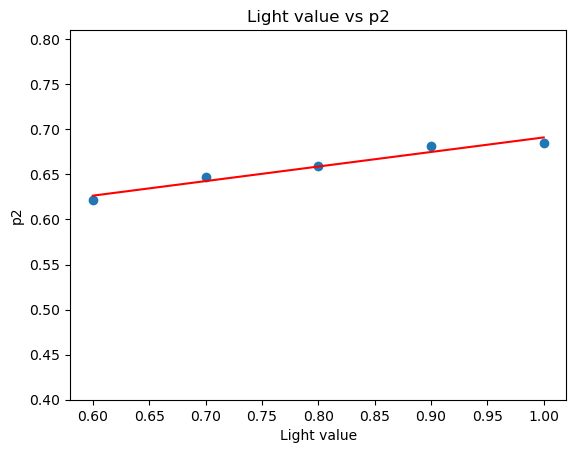

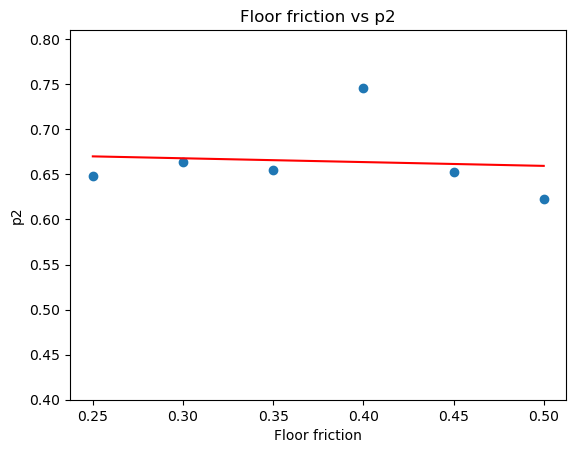

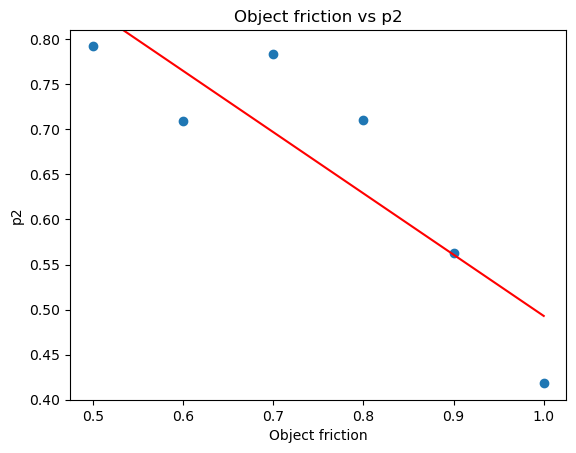

In [59]:
print("Considered function of: "+"object friction")
plot_operationalParam_vs_environmentalVariables(operational_parameter='p2',plotRange=[0.4, 0.81])

## Check p3:

Considered function of: light


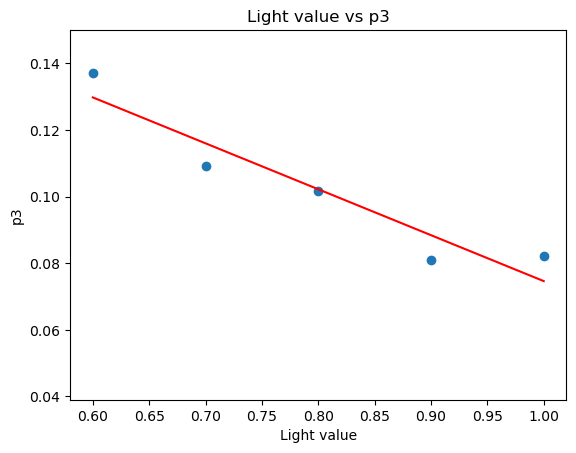

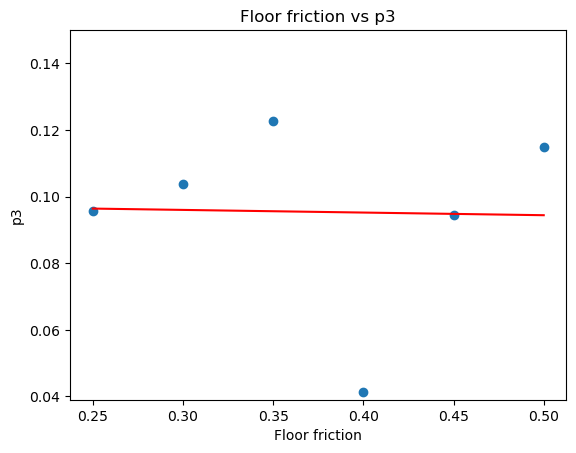

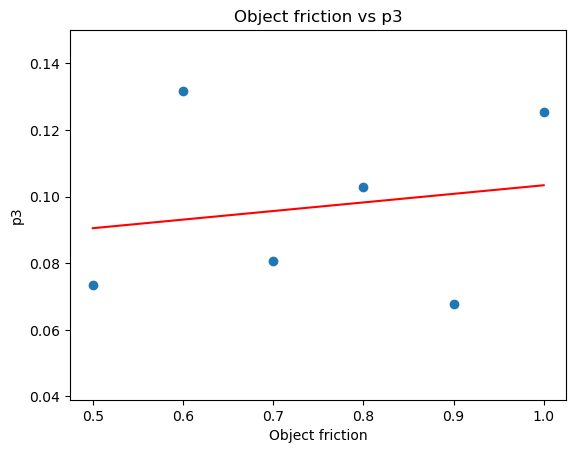

In [60]:
print("Considered function of: "+"light") #before was from floor friction


plot_operationalParam_vs_environmentalVariables(operational_parameter='p3',plotRange=[0.039, 0.15])

## p4 - modify function
- p4 - changed function.  Added clause if p4=f(object) > 0.6 then p1=1



Considered function of: object friction


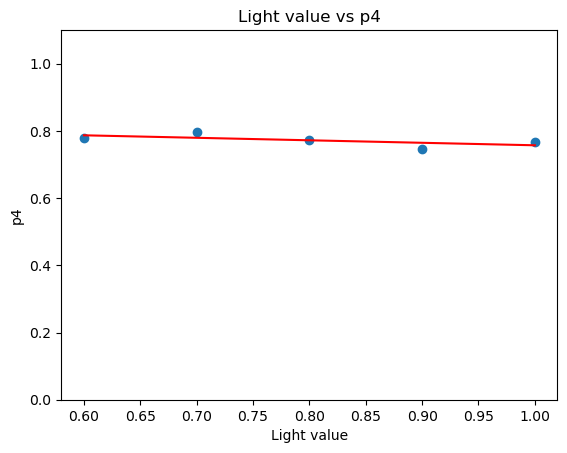

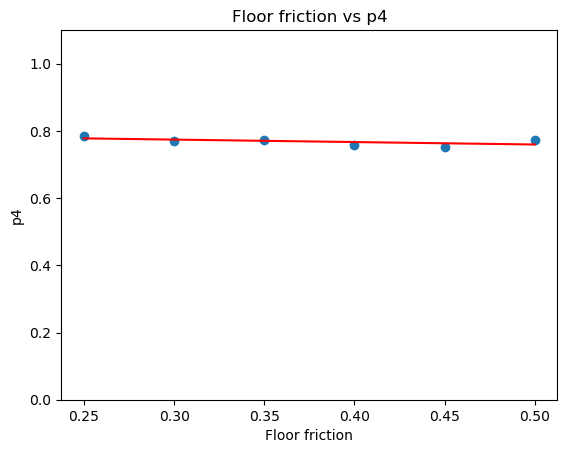

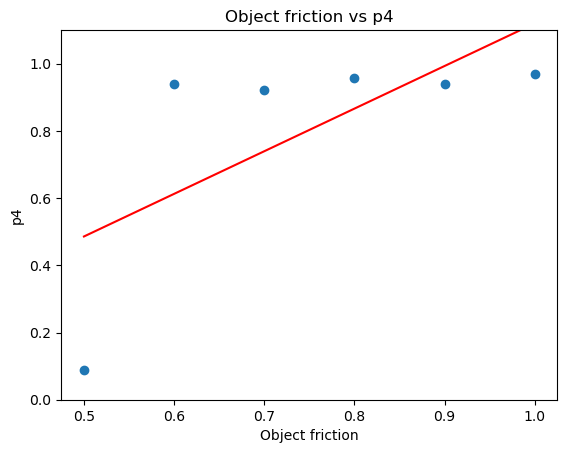

In [61]:
print("Considered function of: "+"object friction")
plot_operationalParam_vs_environmentalVariables(operational_parameter='p4',plotRange=[0,1.1])

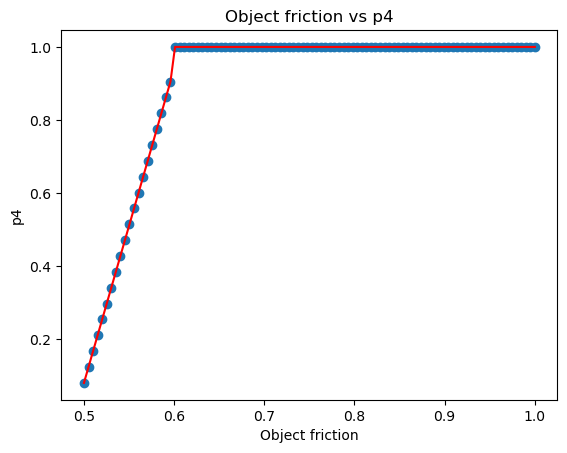

<module 'matplotlib.pyplot' from '/Users/grisv/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [62]:
#p4 is dependant on Object friction, changed to be:

env = ['Light value','Floor friction','Object friction']
dfs = {env[0]:df_light , env[1]:df_friction_floor , env[2]:df_friction_obj}

def _plot_p4(df,column = 'Object friction'):
    x = df[column]
    y = []
    
    
    min_value = x.min()
    max_value = x.max()
    # Create a vector of 100 points between min_value and max_value
    x = np.linspace(min_value, max_value, 100)
    
    
    for i in range (0,len(x)):
        if x[i]<0.6:
            y.append(8.6*x[i]-4.22)
        else:
            y.append(1)
    
    # plot
    plt.scatter(x, y)
    plt.xlabel(column)
    plt.ylabel('p4')
    plt.title(f'{column} vs p4')
    
    # Create a vector of 100 points between min_value and max_value
    
    plt.plot(x,y, 'r-', label='Fit')
    # Set the y-axis range (adjust as needed)
    plotRange=[0,1.1]
    #plt.ylim(plotRange[0], plotRange[1])
    
    # plot the fitted curve
    plt.show()
    return plt

_plot_p4(df_friction_obj)

##  Check T1:
- T1 as an average of light and floor, check if this makes sense.

Considered function of: light AND floor friction


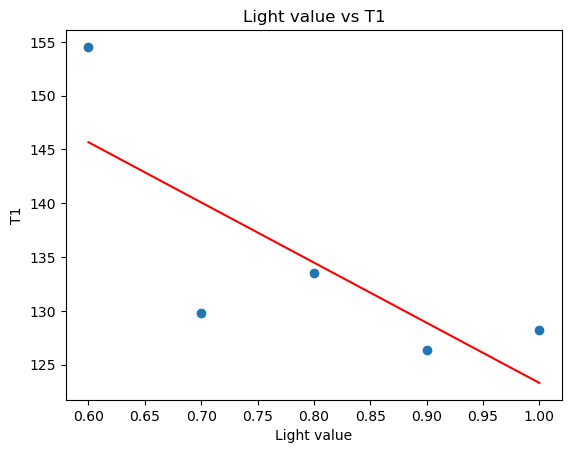

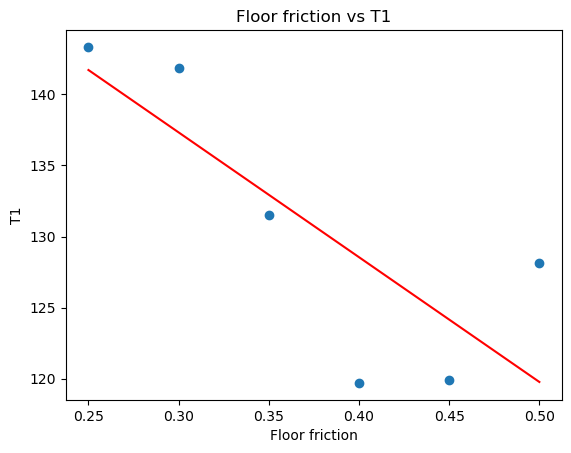

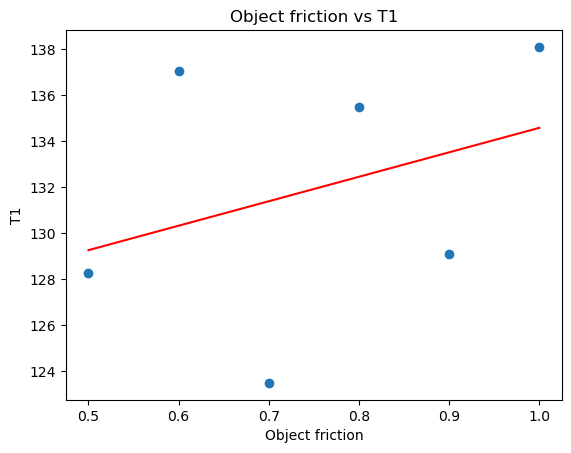

In [63]:
print("Considered function of: "+"light AND floor friction")
plot_operationalParam_vs_environmentalVariables(operational_parameter='T1',plotRange=[])

### Check T1F outliner in Floor friction (although not important as discarded when defining T1F as a constant)

Considered function of: NONE


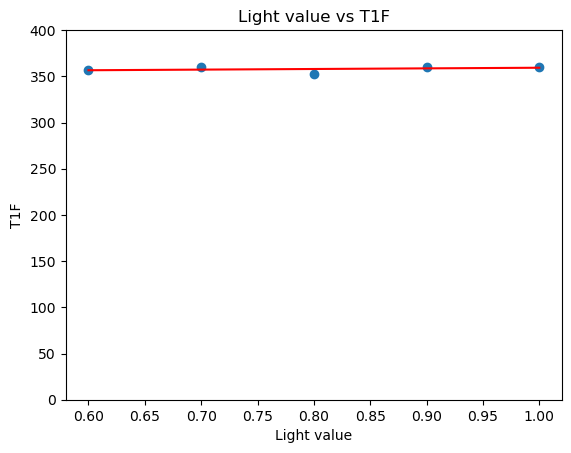

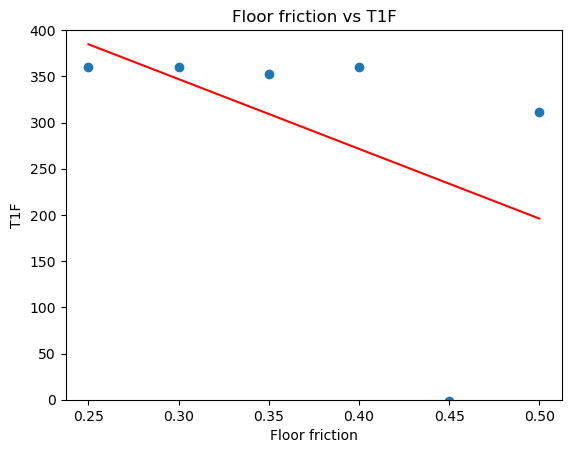

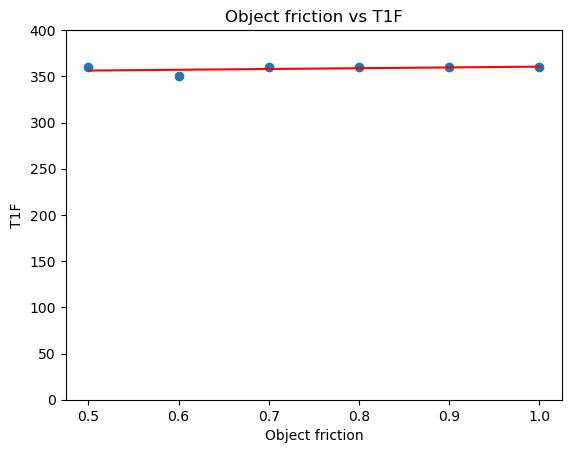

In [73]:
print("Considered function of: "+"NONE")
plot_operationalParam_vs_environmentalVariables(operational_parameter='T1F',plotRange=[0,400])

### T2
This is not dependant as it varying between 31.8 and 32.8, I assume

Considered function of: NONE


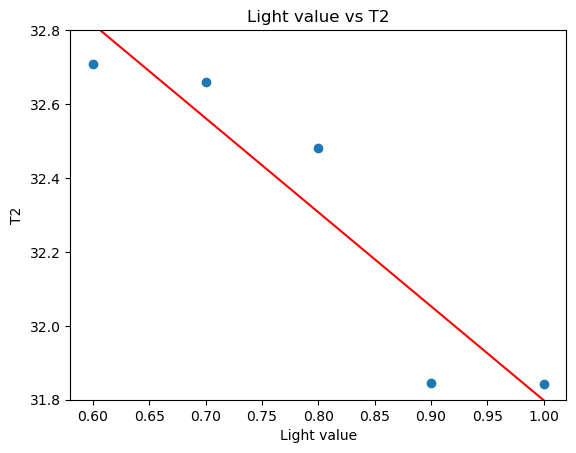

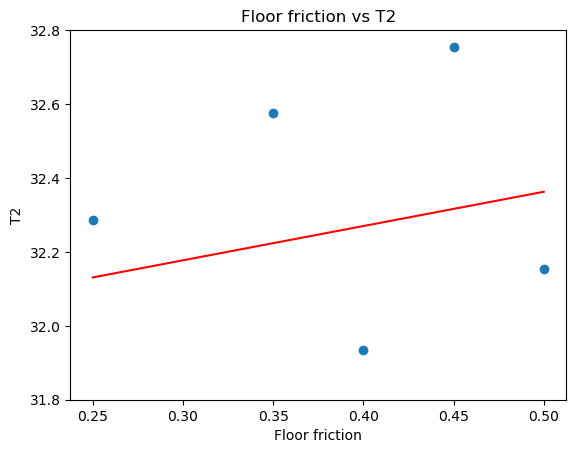

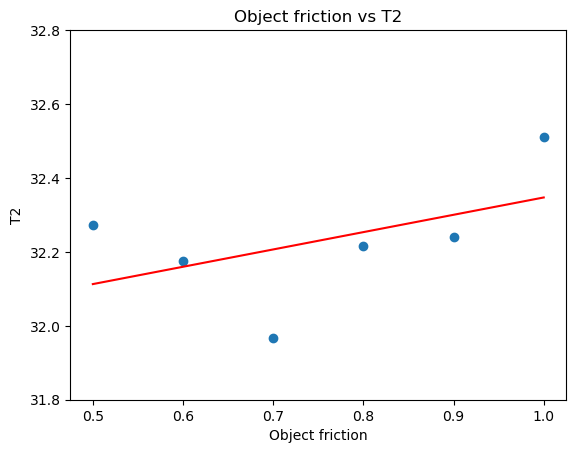

In [65]:
print("Considered function of: "+"NONE")
plot_operationalParam_vs_environmentalVariables(operational_parameter='T2',plotRange=[31.8,32.8])

Considered function of: NONE


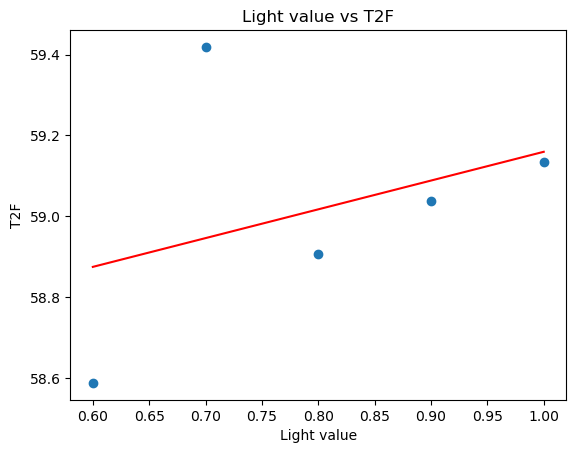

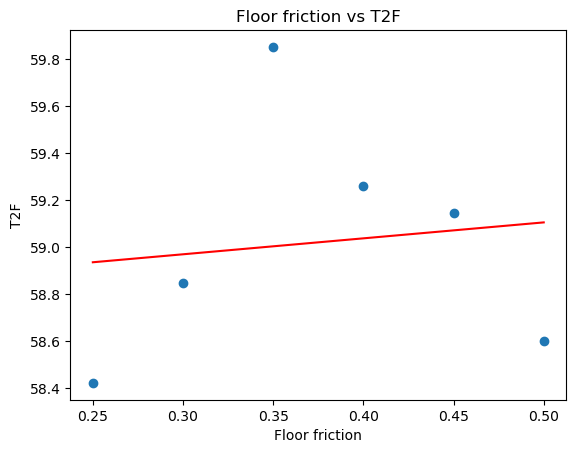

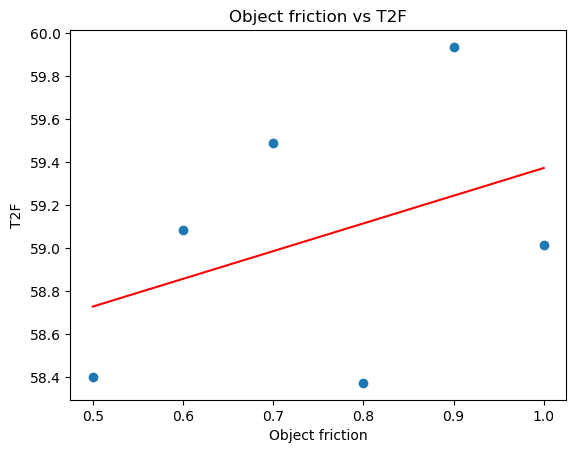

In [66]:
print("Considered function of: "+"NONE")
plot_operationalParam_vs_environmentalVariables(operational_parameter='T2F',plotRange=[])

### Check if only dependant of Floor (as it varies in a very large range in all of them ~[90,50]

Considered function of: floor friction


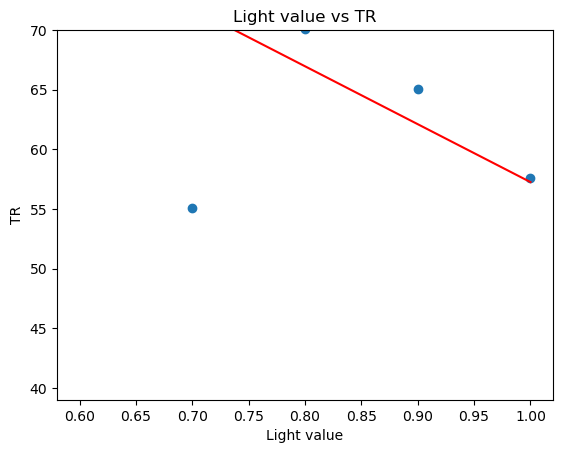

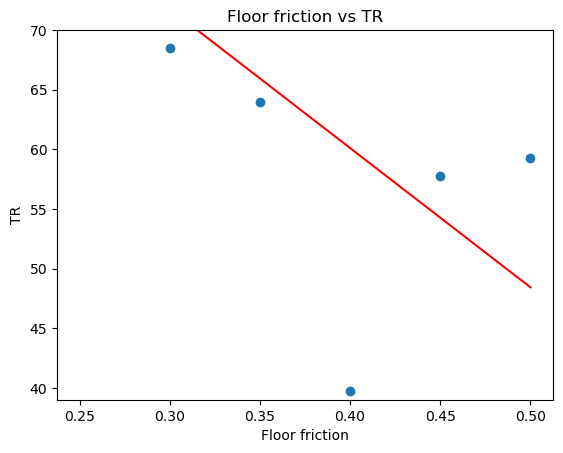

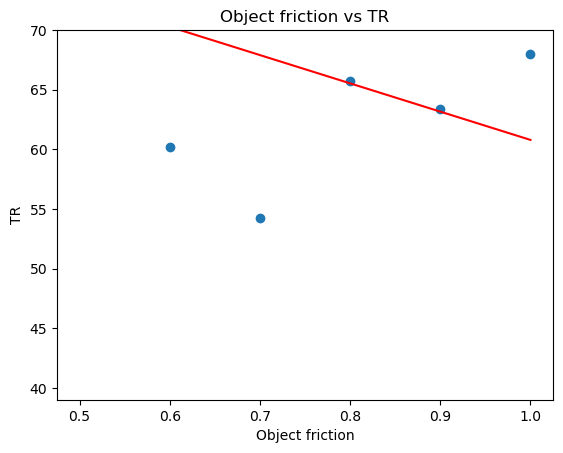

In [74]:
print("Considered function of: "+"floor friction")
plot_operationalParam_vs_environmentalVariables(operational_parameter='TR',plotRange=[39,70])

### Check if independent

Considered function of: None


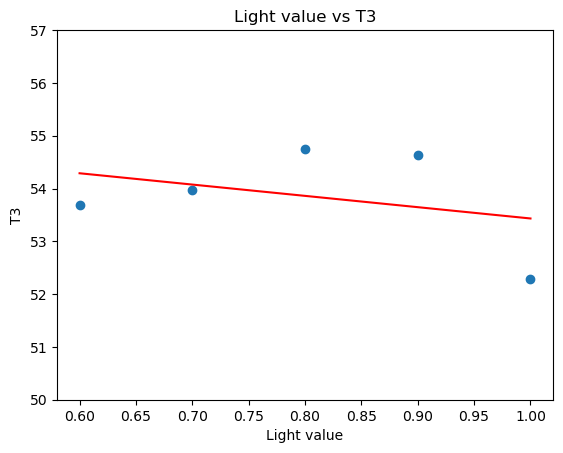

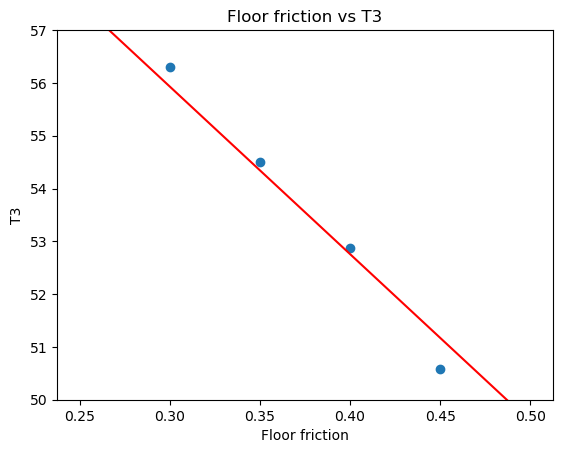

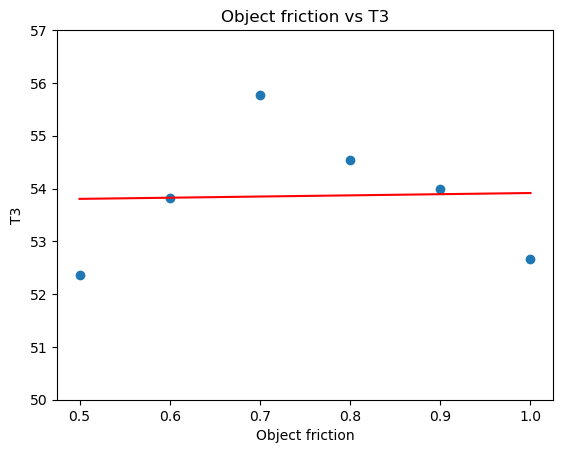

In [68]:
print("Considered function of: "+"None")
plot_operationalParam_vs_environmentalVariables(operational_parameter='T3',plotRange=[50,57])

### Pretry is fine as it is set to be constant

Considered function of: None


/Users/grisv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


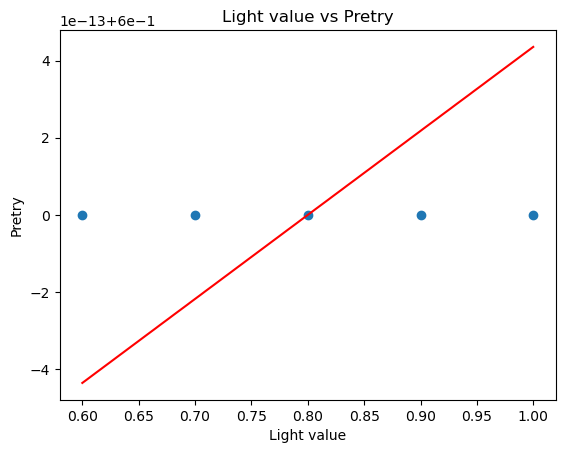

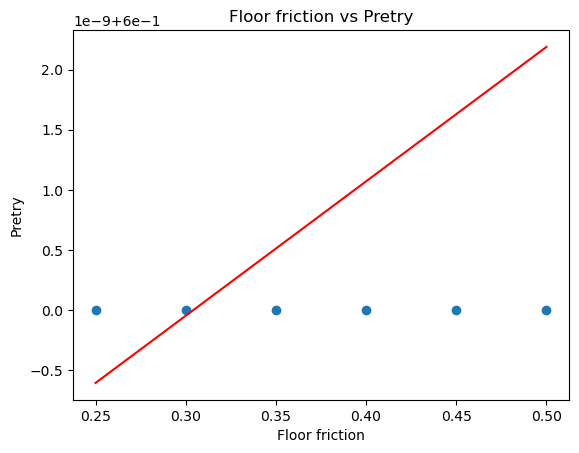

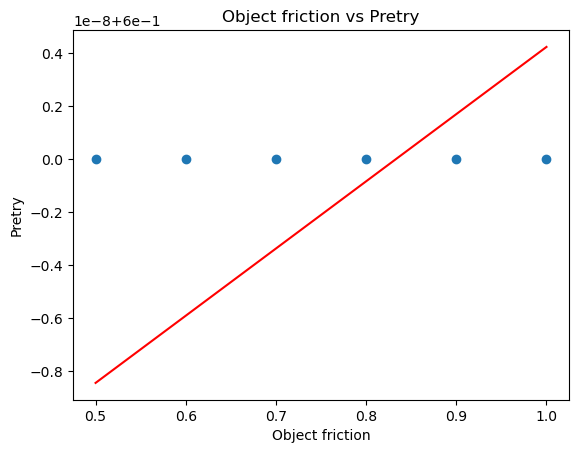

In [69]:
print("Considered function of: "+"None")
plot_operationalParam_vs_environmentalVariables(operational_parameter='Pretry',plotRange=[])

# 2) Historical data plots 

### (not used for now, see Jupyther notebook 2LoopUpTables, synthetic data for a "day" is created)

#### Data as provided by the Historical Data based on the Robot simulator

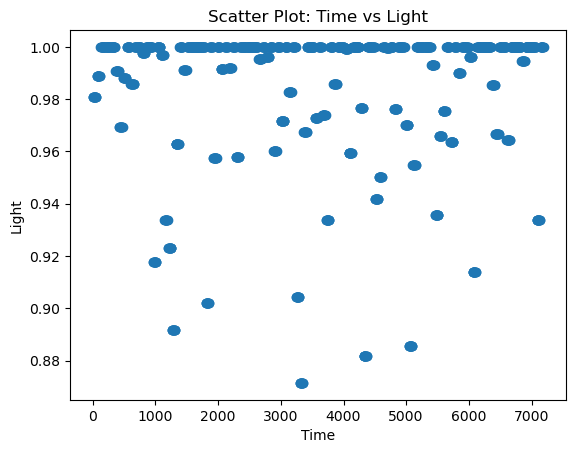

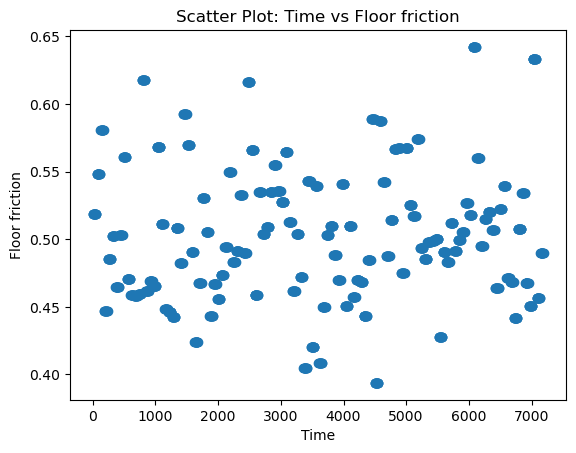

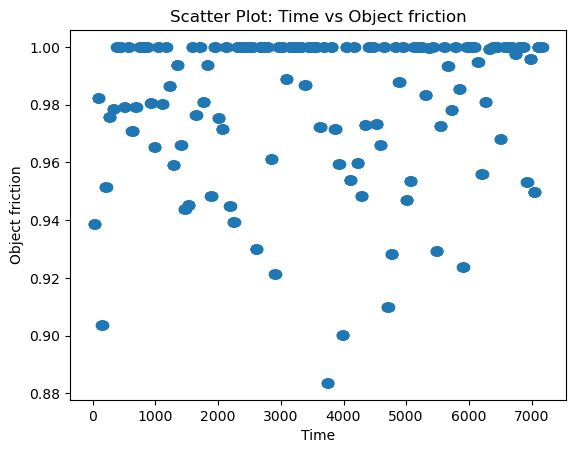

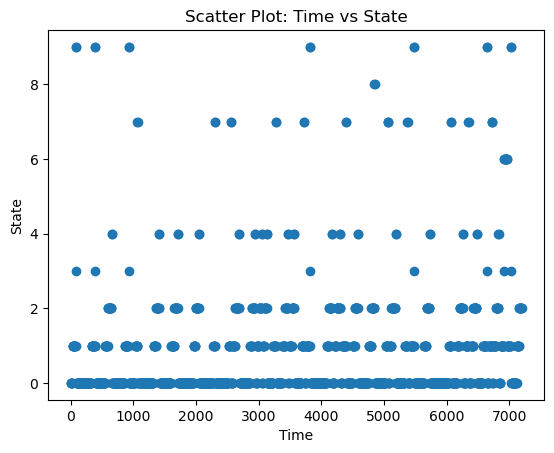

In [78]:
file_path = 'day.csv'  #  file path
df = pd.read_csv(file_path)

# Extract column names
columns = df.columns

# Plot all combinations of two columns
for i in range(1):
    for j in range(i + 1, len(columns)):
        # Scatter plot
        plt.scatter(df[columns[i]], df[columns[j]])
        
        # Add labels and title
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
        # Show the plot
        plt.show()



### Rearranging data to see change in light
From the Excel interactive page, we set values of:

```
- Bounding values for PMC formulae

0.7  	a value in F “success”>a		
400	    b value in CompletionTime<=b			
0.16	c value in F“binning_fail"<=c
```
```
- Fix floor and object friction

0.25 Floor friction
0.6 Object fric
```

Resulting in:
```
In violation	109	60.5555556	%
In safe zone	71	39.4444444	%
Total	180
```
(refer to Excel file "ViolationZone_dtmc_values" to see 180 entries)



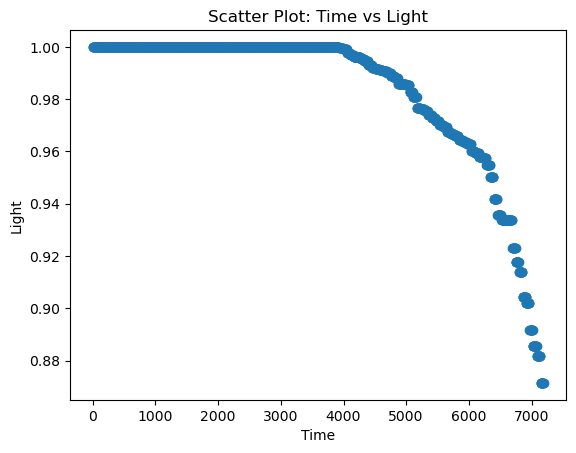

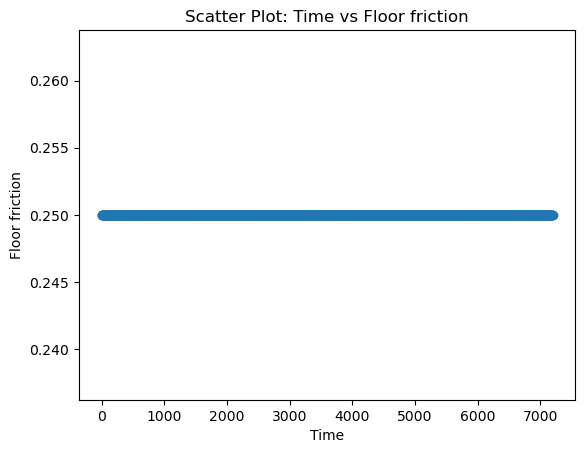

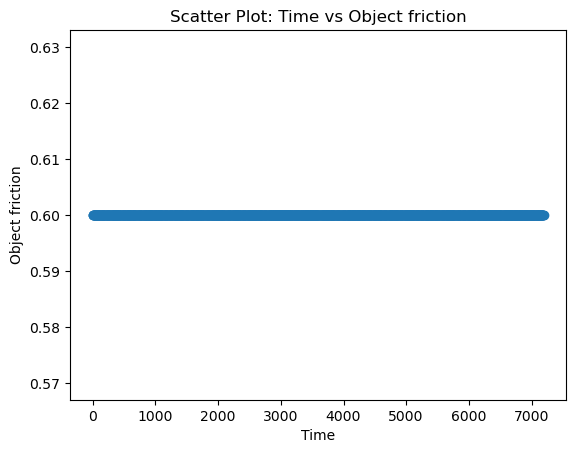

In [71]:
file_path = 'fakeDay.csv'  # file
df = pd.read_csv(file_path)

# Extract column names
columns = df.columns

for i in range(1):
    for j in range(i + 1, len(columns)):
        # Scatter plot
        plt.scatter(df[columns[i]], df[columns[j]])
        
        # Add labels and title
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
        # Show the plot
        plt.show()